In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Constantes para comparação e calculos
electron_mass = 9.10938356e-31
electron_charge = 1.60217662e-19
planck_constant = 6.62607004e-34

In [3]:
#Funções gaussianas e de fit
def fit(data,funct,guess):
    def gaussian_fit(x,A,mean,sigma):
        return A*np.exp(-(x-mean)**2/(2*sigma**2))
    
    #fit gaussian to data
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(gaussian_fit, data, funct(data), p0=guess)
    print("FIT: ",popt)
    return popt

def gaussian(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))


In [4]:
#Função para calcular o produto de massa e carga de um elétron
def calculateME(a,da):
    a = a*1e-9
    da = da*1e-9
    sme = planck_constant/(np.sqrt(2)*a)
    dsme = planck_constant*da/(np.sqrt(2)*a**2)
    return (sme**2,2*sme*dsme)

FIT:  [6.78344238e-01 1.45994876e-49 2.13033926e-51]


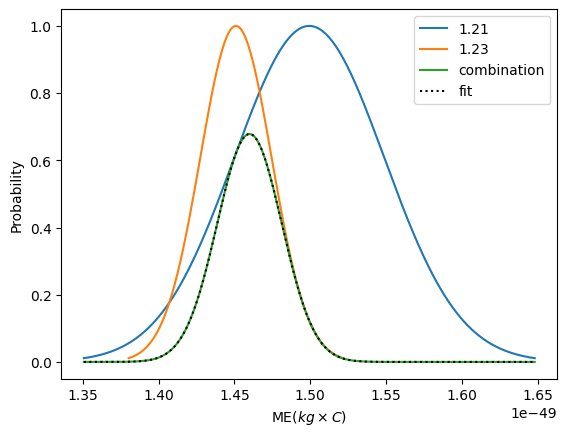

ME: 1.4599487589344352e-49 +/- 2.1303392626422316e-51
VALOR DE REFERENCIA
 1.4594841362444368e-49


In [5]:
# Calculos da Difração de elétrons. Nenhuma gaussiana aqui está normalizada!!
mean_1, sigma_1 = calculateME(1.21,0.02) # D1 
mean_2, sigma_2 = calculateME(1.23,0.01) # D2

fig, ax = plt.subplots()
# Como tinhamos apenas duas gaussianas, fiz o produto delas com uma lambda function
product_gaussians = lambda x: gaussian(x,mean_1,sigma_1)*gaussian(x,mean_2,sigma_2)

x_1 = np.linspace(mean_1-3*sigma_1,mean_1+3*sigma_1,1000)
x_2 = np.linspace(mean_2-3*sigma_2,mean_2+3*sigma_2,1000)
ax.plot(x_1,gaussian(x_1,mean_1,sigma_1),label='1.21')
ax.plot(x_2,gaussian(x_2,mean_2,sigma_2),label='1.23')
ax.plot(x_1,product_gaussians(x_1),label='combination')
ax.set_xlabel(r'ME($kg \times C$)')
ax.set_ylabel('Probability')

x_dif = x_1 #Alias para semantica
#Fit da combinação de gaussianas para determinar a média e o desvio padrão
guesses = [np.max(product_gaussians(x_dif)), x_dif[np.argmax(product_gaussians(x_dif))], sigma_1]
amax_dif, mean_dif, sigma_dif = fit(x_dif,product_gaussians,guesses)
P_difracao = lambda x: amax_dif*gaussian(x,mean_dif,sigma_dif)

#Plota fit da gaussiana combinada para comparação
ax.plot(x_dif,P_difracao(x_dif),"k:",label='fit')
ax.legend()
plt.show()
print("ME:", mean_dif, "+/-", sigma_dif)
print("VALOR DE REFERENCIA\n", electron_mass*electron_charge)


FIT:  [ 1.11114267e-16  1.59850374e-19 -8.93311249e-22]


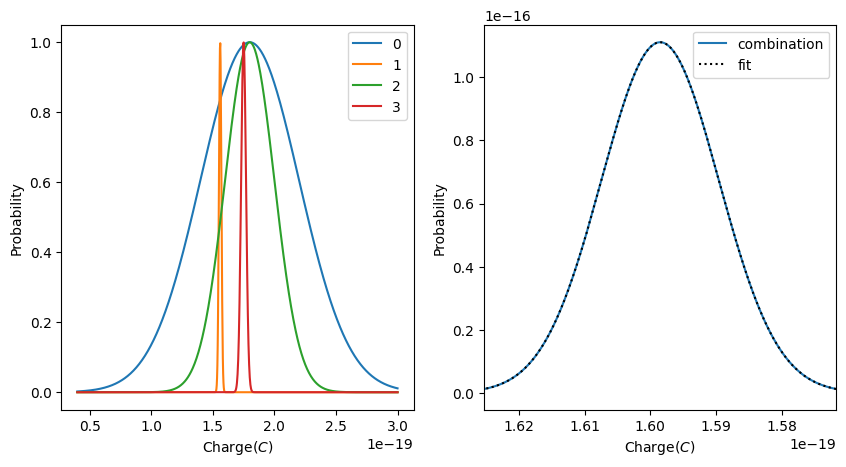

Charge: 1.598503740648379e-19 +/- -8.933112489671067e-22
VALOR DE REFERENCIA
 1.60217662e-19


In [6]:
#Experimento de Planck para determinação da carga do elétron
#Dados: Planck 2 fit, Planck 2 visual, Planck 1 3B fit do gráfico inverso e PASCO
charges = np.array([1.8,1.56,1.8,1.75])*1e-19
errors = np.array([0.4,0.01,0.2,0.02])*1e-19

#Função para combinar as gaussianas das medidas de carga.
def combination(x):
    y = 1;
    for i in range(len(charges)):
        y*=gaussian(x,charges[i],errors[i])
    return y

#Plot das gaussianas
x = np.linspace(0.4e-19,3e-19,1000)
fig, ax = plt.subplots(1,2,figsize=(10,5))

for i in range(len(charges)):
    ax[0].plot(x,gaussian(x,charges[i],errors[i]),label=str(i))
ax[0].legend()
ax[0].set_xlabel(r'Charge($C$)')
ax[0].set_ylabel('Probability')

#Plota combinação de gaussianas em outro eixo
x_carga = np.linspace(1.57e-19,1.63e-19,1000)
ax[1].plot(x_carga,combination(x_carga),label='combination')
ax[1].set_xlabel(r'Charge($C$)')
ax[1].set_ylabel('Probability')

#Fit da combinação de gaussianas para determinar a média e o desvio padrão
guesses = [np.max(combination(x_carga)), x[np.argmax(combination(x))], errors[0]]
amax_carga, mean_carga, sigma_carga = fit(x_carga,combination,guesses)
P_carga = lambda x: amax_carga*gaussian(x,mean_carga,sigma_carga)

#Plota fit da gaussiana combinada para comparação
ax[1].plot(x_carga,P_carga(x_carga),"k:",label='fit')
ax[1].set_xlim(mean_carga-3*sigma_carga,mean_carga+3*sigma_carga)
ax[1].legend()
plt.show()

print("Charge:", mean_carga, "+/-", sigma_carga)
print("VALOR DE REFERENCIA\n", electron_charge)


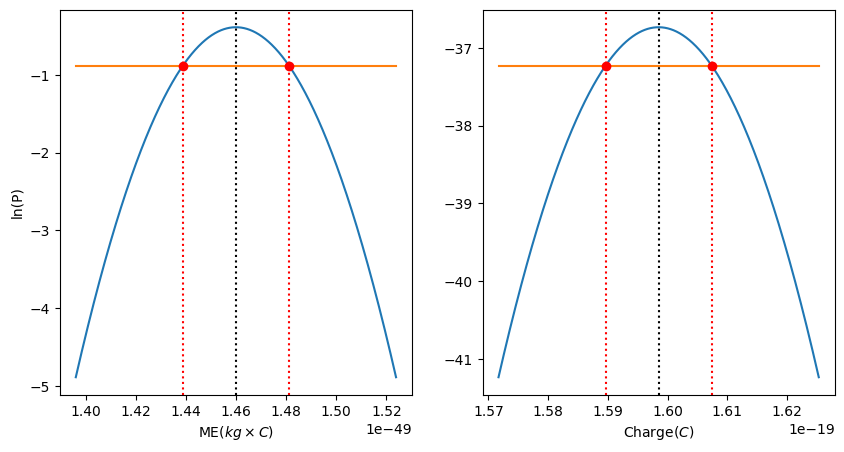

Difração - Mean: 1.4599487589344352e-49
1.4386453663080128e-49 1.4811242032567949e-49
--> 2.123941847439103e-51
Carga - Mean: 1.598503740648379e-19
1.60743685313805e-19 1.589624280485973e-19
--> -8.906286326038472e-22


In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
x_dif = np.linspace(mean_dif-3*sigma_dif,mean_dif+3*sigma_dif,1000)
x_carga = np.linspace(mean_carga-3*sigma_carga,mean_carga+3*sigma_carga,1000)
P_dif = np.log(P_difracao(x_dif))
dif_err_line = np.log(P_difracao([mean_dif]*len(x_dif)))-0.5
idx_dif = np.argwhere(np.diff(np.sign(P_dif - dif_err_line))).flatten()

P_charge = np.log(P_carga(x_carga))
charge_err_line = np.log(P_carga([mean_carga]*len(x_carga)))-0.5
idx_charge = np.argwhere(np.diff(np.sign(P_charge - charge_err_line))).flatten()

ax[0].plot(x_dif,P_dif,label='difração')
ax[0].plot(x_dif,dif_err_line)
ax[0].plot(x_dif[idx_dif], P_dif[idx_dif], 'ro')
ax[0].axvline(x_dif[idx_dif[0]],color='r',linestyle=':')
ax[0].axvline(x_dif[idx_dif[1]],color='r',linestyle=':')
ax[0].axvline(mean_dif,color='k',linestyle=':')

ax[1].plot(x_carga,P_charge,label='carga')
ax[1].plot(x_carga,charge_err_line)
ax[1].plot(x_carga[idx_charge], P_charge[idx_charge], 'ro')
ax[1].axvline(x_carga[idx_charge[0]],color='r',linestyle=':')
ax[1].axvline(x_carga[idx_charge[1]],color='r',linestyle=':')
ax[1].axvline(mean_carga,color='k',linestyle=':')

ax[0].set_ylabel("ln(P)")
ax[0].set_xlabel(r'ME($kg \times C$)')
ax[1].set_xlabel(r'Charge($C$)')
plt.show()
print("Difração - Mean:", mean_dif)
print(x_dif[idx_dif[0]],x_dif[idx_dif[1]])
print("-->",(x_dif[idx_dif[1]]-x_dif[idx_dif[0]])/2)
print("Carga - Mean:", mean_carga)
print(x_carga[idx_charge[0]],x_carga[idx_charge[1]])
print("-->",(x_carga[idx_charge[1]]-x_carga[idx_charge[0]])/2)


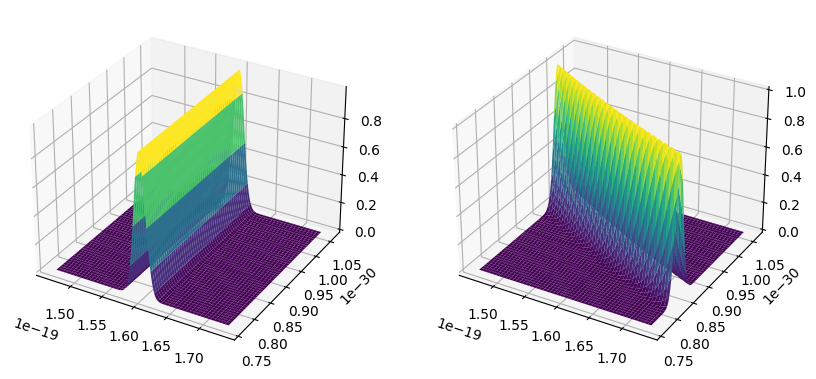

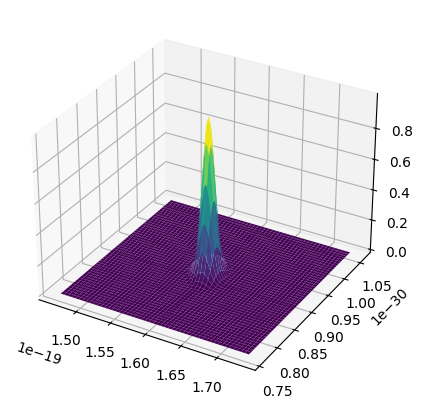

In [45]:
#3D Plot Carga
X = np.linspace(mean_carga-15*sigma_carga,mean_carga+15*sigma_carga,1000)
Y = np.linspace(electron_mass-1.5e-31,electron_mass+1.5e-31,1000)
X, Y = np.meshgrid(X, Y)
Z_1 = gaussian(X,mean_carga,sigma_carga)
Z_2 = gaussian(X*Y,mean_dif,sigma_dif)
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})
ax[0].plot_surface(X, Y, Z_1, cmap='viridis', edgecolor='none')
ax[1].plot_surface(X, Y, Z_2, cmap='viridis', edgecolor='none')

fig, ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection':'3d'})
ax.plot_surface(X, Y, Z_1*Z_2, cmap='viridis', edgecolor='none')

(8.60938356e-31, 9.60938356e-31)

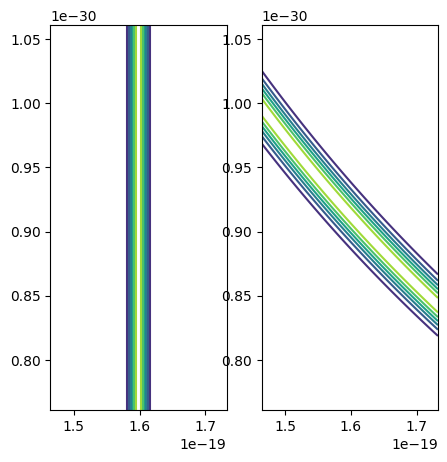

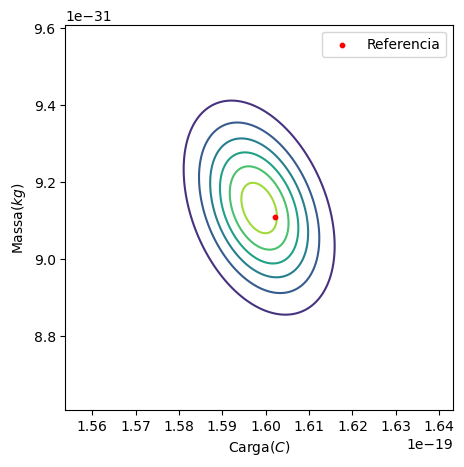

In [67]:
#Curvas de níveis
fig, ax = plt.subplots(1,2,figsize=(5,5))
ax[0].contour(X, Y, Z_1)
ax[1].contour(X, Y, Z_2)
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contour(X, Y, Z_1*Z_2)
ax.scatter(electron_charge,electron_mass,color='r',marker='o',s=10, zorder=10, label="Referencia")
ax.set_xlabel(r'Carga($C$)')
ax.set_ylabel(r'Massa($kg$)')
ax.legend()
ax.set_xlim(mean_carga+5*sigma_carga,mean_carga-5*sigma_carga)
ax.set_ylim(electron_mass-0.5e-31,electron_mass+0.5e-31)